## Iris Species Dataset

""
- The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.
- Predicted attribute: class of iris plant
- Number of Instances: 150 (50 in each of three classes)
- Number of features (attributes): 4 numeric, predictive attributes and the class
- Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
       - Iris Setosa
       - Iris Versicolour
       - Iris Virginica
- Missing Attribute Values: None
- Class Distribution: 33.3% for each of 3 classes.

"" 

Fisher, R.A.. (1988). Iris. UCI Machine Learning Repository.

In [24]:
from sklearn.datasets import load_iris
import wget
import requests
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Download dataset


In [4]:
os.getcwd()

'/home/saito/Documents/picpay/iris-classifier-challenge/notebooks'

In [ ]:
def download_dataset():
    # data_url = ''
    # response = requests.get(url, stream=True)

    ##With requests
    #url = 'https://www.facebook.com/favicon.ico'
    #r = requests.get(url, allow_redirects=True)
    #open('facebook.ico', 'wb').write(r.content)

    
    root_path = os.getcwd().replace('notebooks', '')
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

    wget.download(url, root_path+'/data/iris-data.csv')
    
    #iris = load_iris()
    #dataset_path = '/'
    #with open((dataset_path + folder_name), 'wb') as dataset:
    #    dataset.write(response.content)
        

download_dataset()

### Load dataset


In [34]:
column_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species' ]
data = pd.read_csv('../data/iris-data.csv', names=column_names, header=None)

### Dataset Overview

In [35]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [37]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [50]:
data.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


### Data Exploration and Visualization

In [43]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

There are only 3 possible class on the dataset.

In [38]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

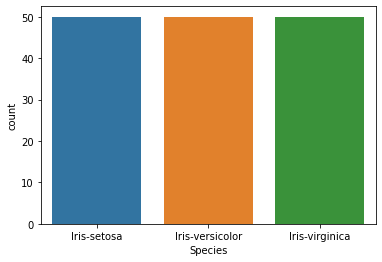

In [42]:
sns.countplot(x='Species',data=data)
plt.show()

Species Distribution: 33.3% for each of 3 classes

In [41]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

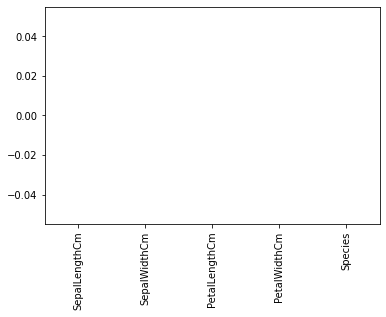

In [49]:
data.isnull().sum().plot(kind='bar')

In [44]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

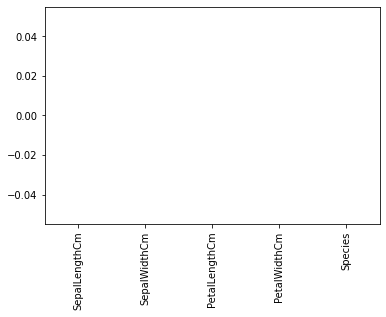

In [48]:
data.isna().sum().plot(kind='bar')

There is no missing values

**Pairplot**

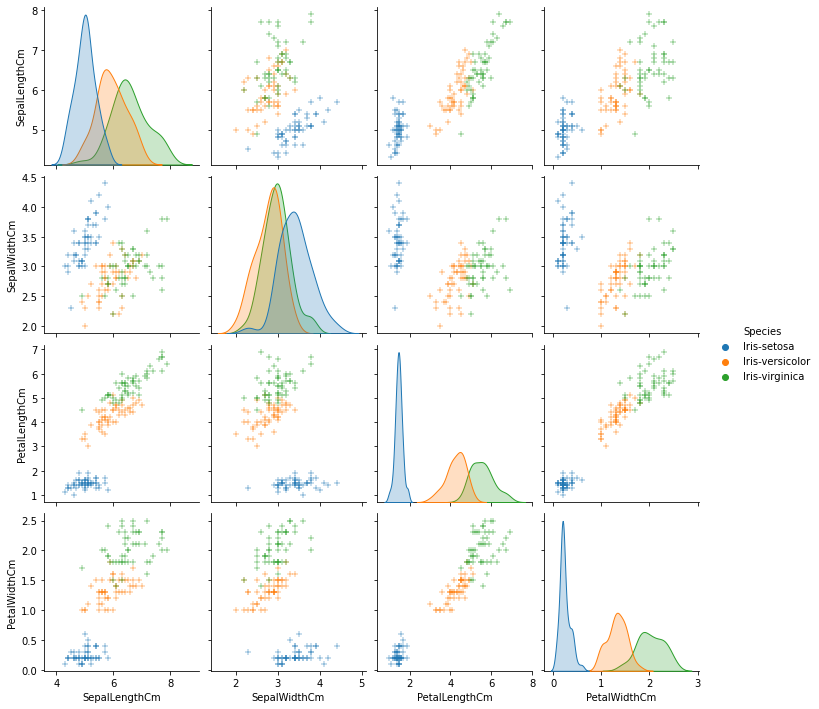

In [39]:
g = sns.pairplot(data, hue='Species', markers='+')
plt.show()

**Observations:**

1) The diagonal shows the distribution of the the dataset for each feature and class.

2) The scatter-plots shows the relation between each and every attribute or features taken pairwise. Looking at the scatter-plots, we can say that no two attributes are able to clearly seperate the tree outcome-class instances.

3) "As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal".

### Box Plot


Over all 3 classes:

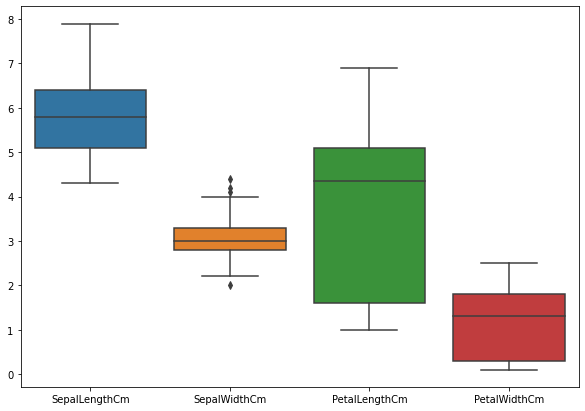

In [53]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=data)
plt.show()

For each class:

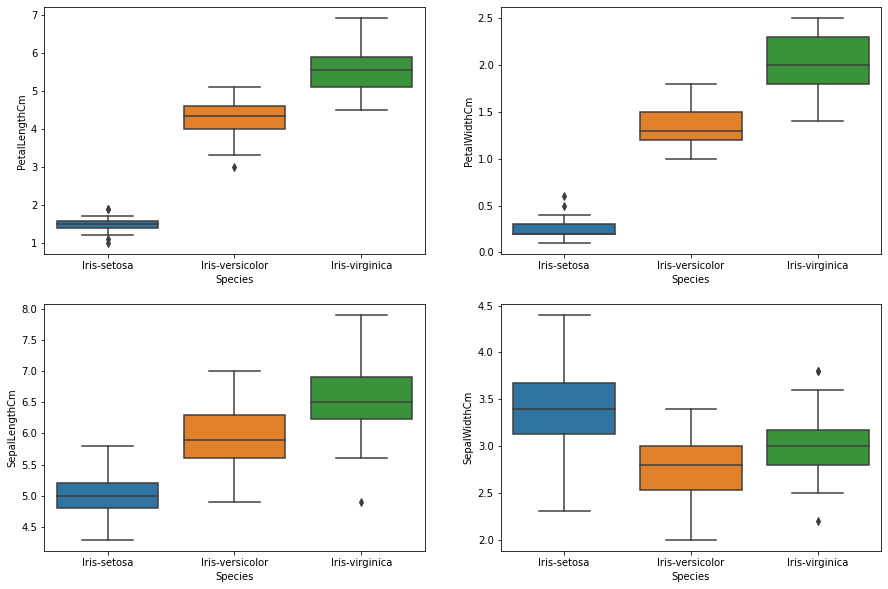

In [51]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=data)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=data)
plt.show()

There are a few outlier detected by boxplot and we can go back after see the result using these features as training samples..

### Violin Plot

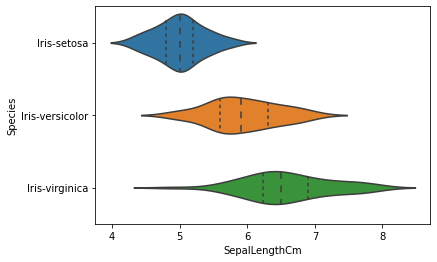

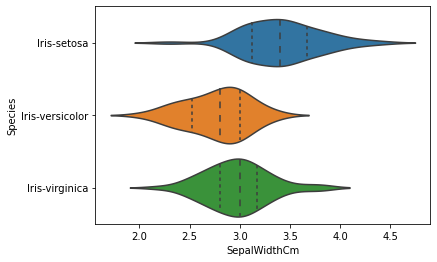

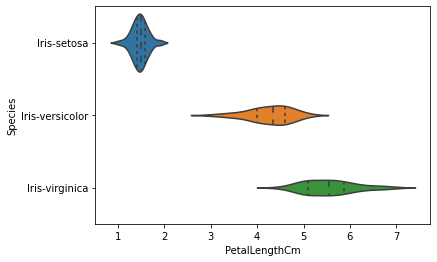

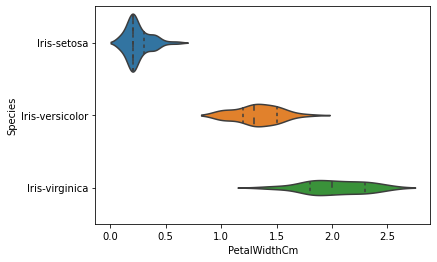

In [40]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=data, inner='quartile')
plt.show()

### Correlation

In [54]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


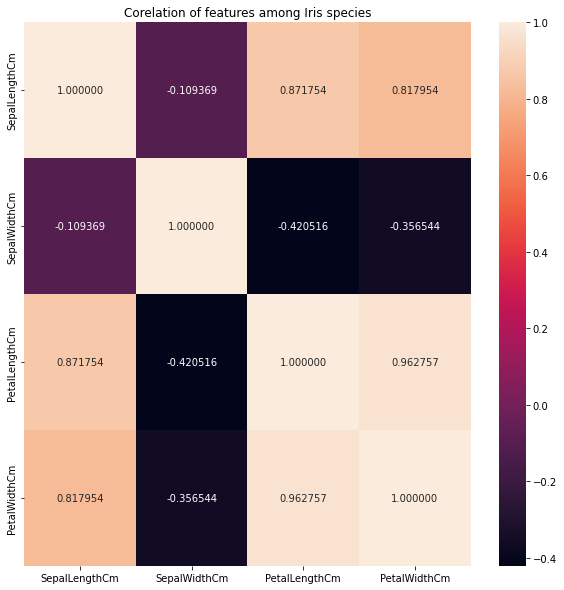

In [55]:
plt.subplots(figsize = (10,10))
sns.heatmap(data.corr(),annot=True,fmt="f").set_title("Corelation of features among Iris species")
plt.show()

The attributes with prefix Petal used to give haih correlation values and the SepalWidthCm looks like is not correlated to any other feature. This column (feature) could be remove if there were much more features, but I preferer to use all four features to train a model.  